# Importing Libraries

In [2]:
#Data Analysis Libraries
import numpy as np 
import pandas as pd 

#Data Viz Libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#ML Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Dataset

In [3]:
#File Paths
tr_path = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
te_path = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [4]:
tr_path.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [14]:
tr_path.shape

(614, 12)

In [5]:
tr_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
tr_path.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Preprocessing and Visualization

<Axes: >

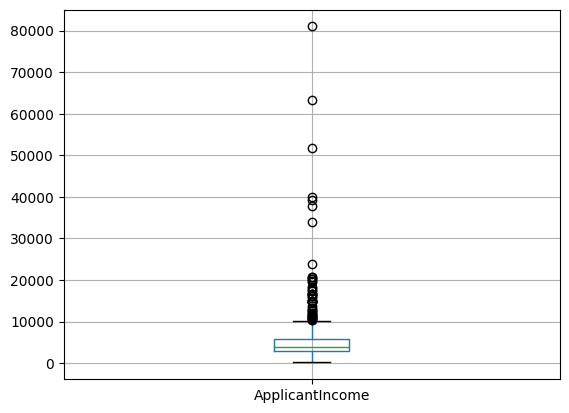

In [22]:
tr_path.boxplot(column='ApplicantIncome')

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

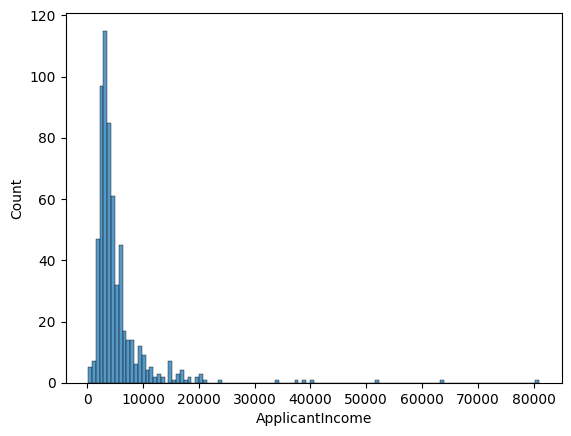

In [16]:
sns.histplot(tr_path['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

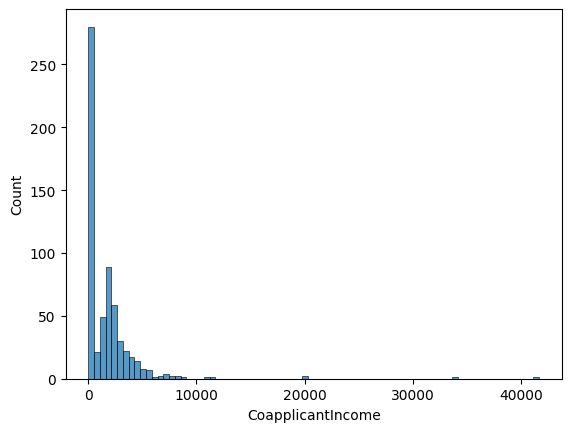

In [17]:
sns.histplot(tr_path['CoapplicantIncome'])

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

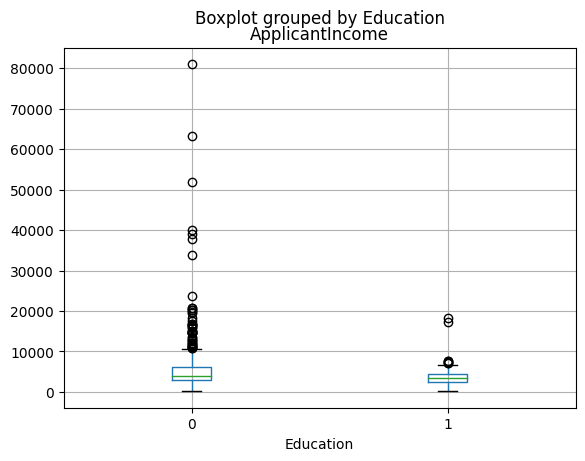

In [23]:
tr_path.boxplot(column='ApplicantIncome', by='Education')

<Axes: xlabel='LoanAmount', ylabel='Count'>

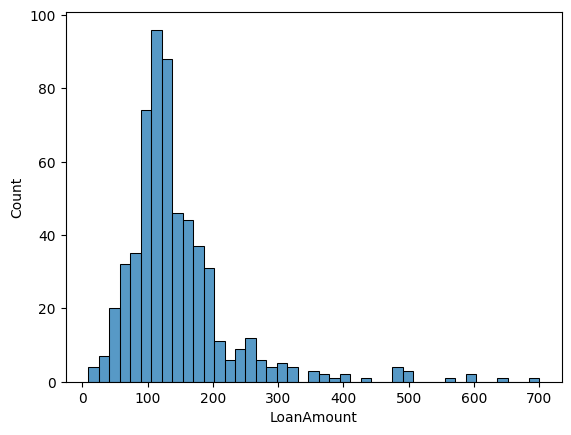

In [24]:
sns.histplot(tr_path['LoanAmount'])

number of columns of object datatype

In [7]:
obj = (tr_path.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 8


As Loan_ID is completely unique and not correlated with any of the other column

In [8]:
tr_path.drop(['Loan_ID'],axis=1,inplace=True)

Visulize the remaining columns

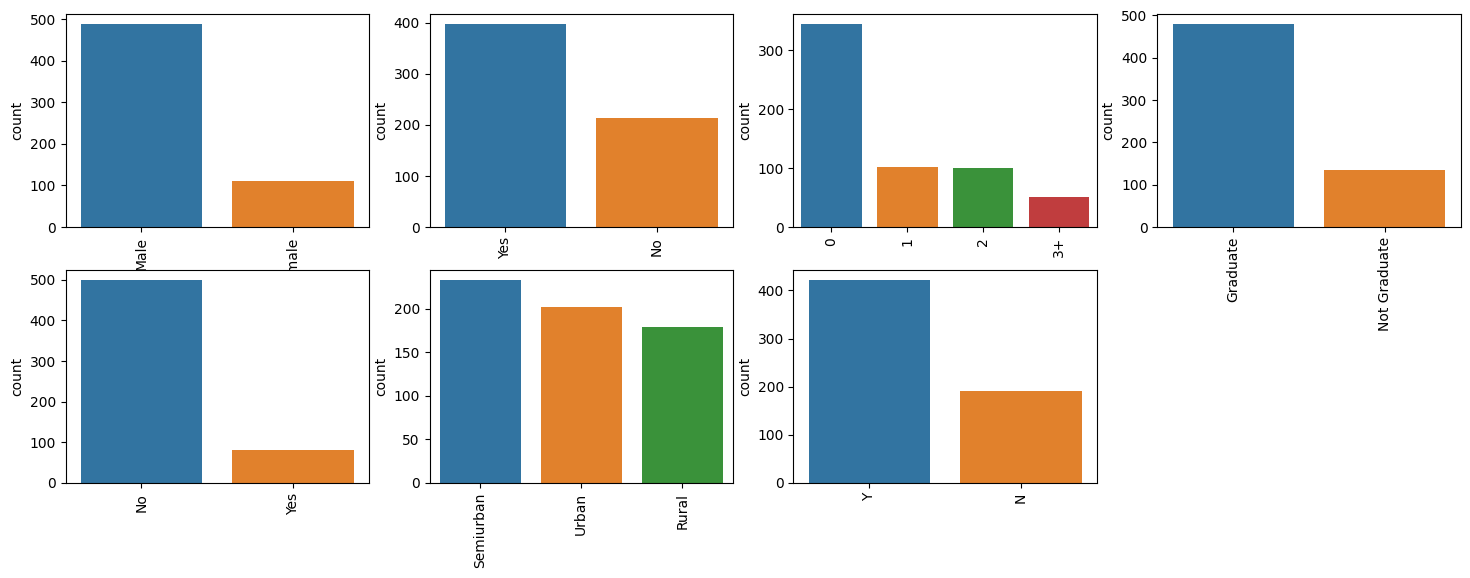

In [9]:
obj = (tr_path.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
    y = tr_path[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index +=1


Converting the categorical values of the columns from binary to int using Label Encoder

In [10]:
label_encoder = preprocessing.LabelEncoder()
obj = (tr_path.dtypes == 'object')
for col in list(obj[obj].index):
  tr_path[col] = label_encoder.fit_transform(tr_path[col])

Checking if any categorical variables are remaining

In [11]:
obj = (tr_path.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


## Correlation between Loan Amount and ApplicantIncome

<Axes: >

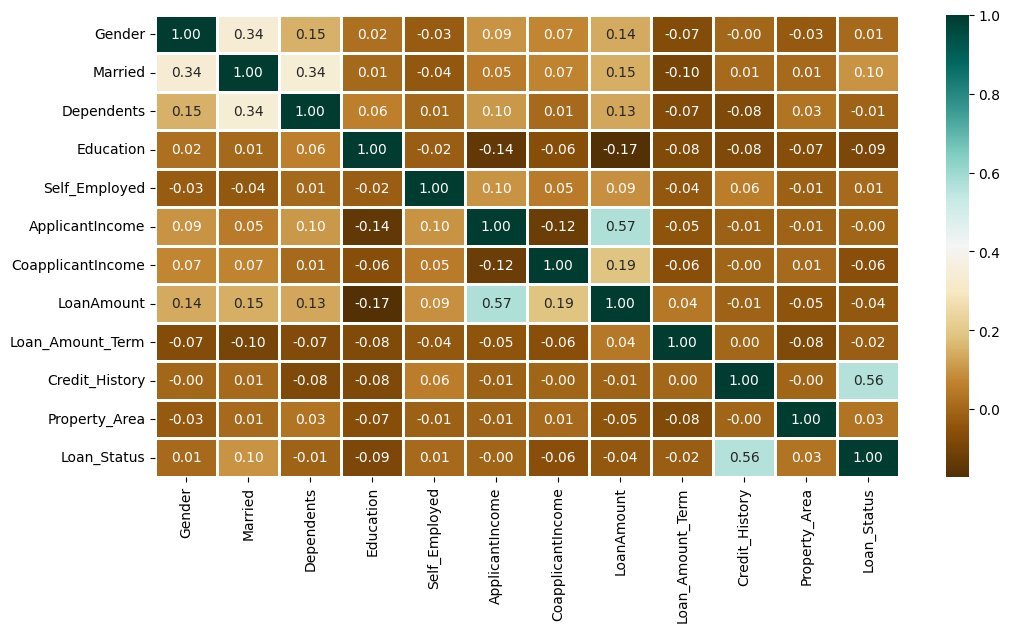

In [12]:
plt.figure(figsize=(12,6))
  
sns.heatmap(tr_path.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

We see that the Loan_Status is affected by the Credit_History

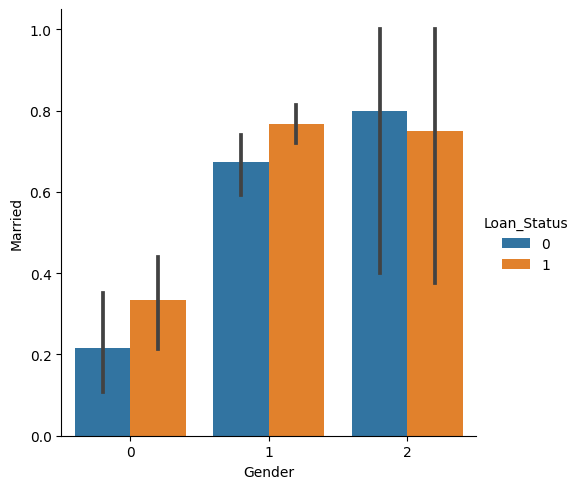

In [42]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status", 
            kind="bar", 
            data=tr_path)

Check if there is any missing values

In [41]:
for col in tr_path.columns:
  tr_path[col] = tr_path[col].fillna(tr_path[col].mean()) 
    
tr_path.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Splitting

In [42]:
from sklearn.model_selection import train_test_split
  
X = tr_path.drop(['Loan_Status'],axis=1)
Y = tr_path['Loan_Status']
X.shape,Y.shape
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((368, 11), (246, 11), (368,), (246,))

In [45]:
print(X_train)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome   
569       1        1           0          0              0             3166  \
571       1        1           4          0              0             5116   
186       1        1           1          0              1             2178   
203       1        1           1          1              0             3500   
589       1        1           2          0              1             2726   
..      ...      ...         ...        ...            ...              ...   
129       1        1           0          0              0             6080   
144       1        1           2          0              0            11757   
72        1        0           0          0              0             3500   
235       1        1           1          0              0             5500   
37        0        1           0          0              0             3667   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

# ML Training

In [43]:
from sklearn import metrics
from sklearn.tree import
  
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
lc = LogisticRegression()
  
# making predictions on the training set
for clf in (rfc, knn,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train, 
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 97.01086956521739
Accuracy score of  KNeighborsClassifier = 77.17391304347827
Accuracy score of  LogisticRegression = 82.88043478260869


c:\Users\keith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
for clf in (rfc, knn,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 76.42276422764228
Accuracy score of  KNeighborsClassifier = 62.19512195121951
Accuracy score of  LogisticRegression = 78.86178861788618


c:\Users\keith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Test Model (ignore for now)

In [56]:
te_path.head(100)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.842199,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...
95,Female,Yes,3+,Graduate,No,6260,0,110.0,360.0,1.000000,Semiurban
96,Male,Yes,1,Graduate,No,3333,4200,256.0,360.0,1.000000,Urban
97,Male,Yes,0,Graduate,No,3500,3250,140.0,360.0,1.000000,Semiurban
98,Male,Yes,3+,Graduate,No,9719,0,61.0,360.0,1.000000,Urban


In [47]:
te_path.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.272645,342.528610,0.826768
std,4910.685399,2334.232099,60.957720,64.620402,0.364807
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [48]:
te_path.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

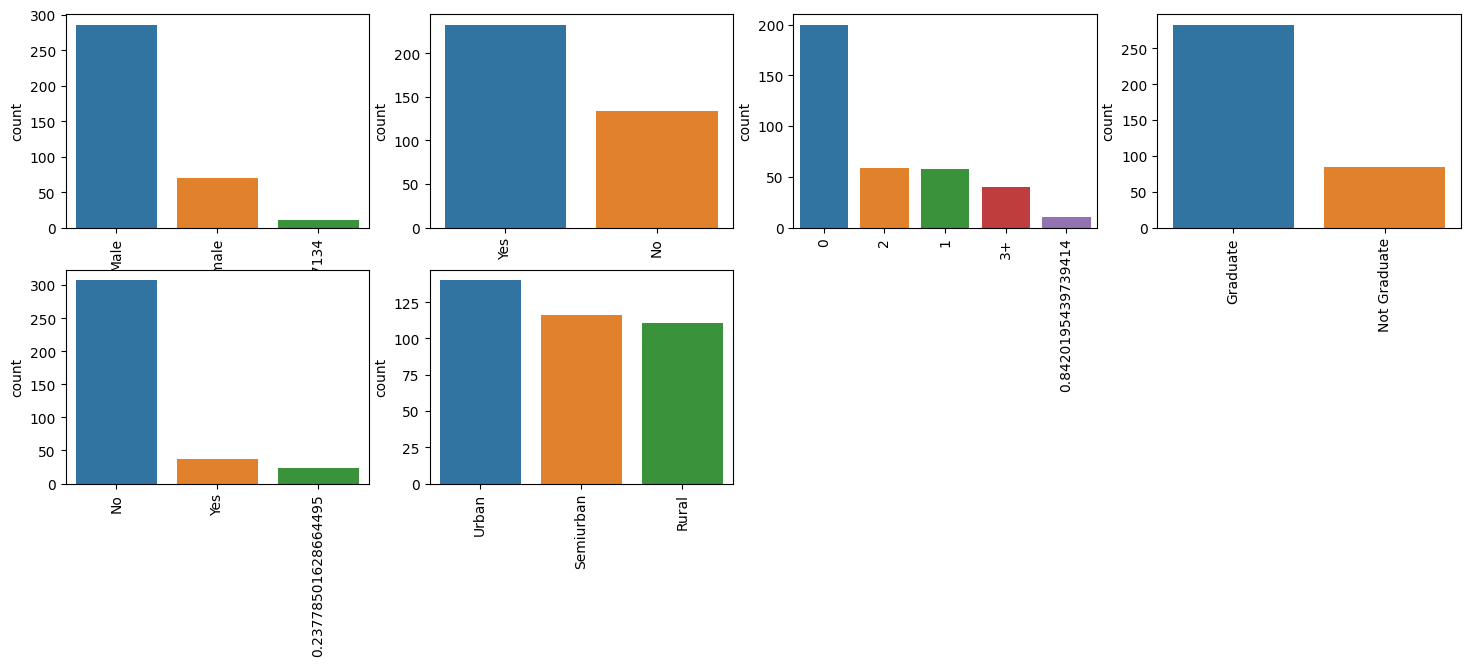

In [54]:
obj = (te_path.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = te_path[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1